In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# create sample pandas dataframe
pizza = {
    "diameter": [6, 8, 10, 14, 18],
    "harga": [7, 9, 13, 17.5, 18]
}
pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


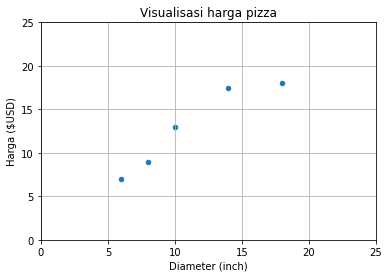

In [4]:
# visualisasi scatter plot dari pd dataframe
# set axies x sebagai diameter dan axies y sebagai harga
pizza_df.plot(kind="scatter", x="diameter", y="harga")
plt.title("Visualisasi harga pizza")
# set label axies x, y
plt.xlabel("Diameter (inch)")
plt.ylabel("Harga ($USD)")
# set max num axies x, y
plt.xlim(0 ,25)
plt.ylim(0 ,25)
# set grid ke True agar ada kotak" ny
plt.grid(True)
plt.show()

In [5]:
'''
Convert pd dataframe ke numpy array
set var x sebagai diameter, var y sebagai harga
Note x merupakan data yg akan di pljari sedgkn
y adalah target yg di prediksi
'''
x = np.array(pizza_df["diameter"])
y = np.array(pizza_df["harga"])
print(f"Value x : {x}\nValue y : {y}")

Value x : [ 6  8 10 14 18]
Value y : [ 7.   9.  13.  17.5 18. ]


In [6]:
'''
value x berisi array 1 dimensi
sedangkan sklearn perlu array 2 dimensi
jadi x harus di reshape agar jadi array 2 dimensi
'''
X = x.reshape(-1, 1)
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

In [7]:
# membuat model ML Linear Reggression
model = LinearRegression()
# panggil method fit untuk melakukan training menggunakan model di atas
model.fit(X, y)

LinearRegression()

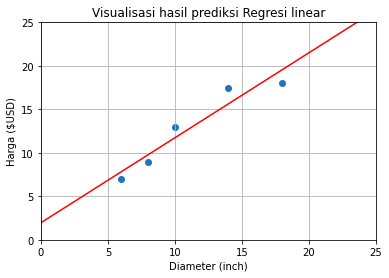

In [8]:
'''
memvisualisasi model regresi linear
membuat var X_vis yang berisi array 2 dimensi dengan cara me reshape
dengan parameter np.array => [0, 25] karena tadi max axies ny 25
membuat var y_vis yang berisi hasil dari prediksi model
'''
X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

'''
Ploting hasil prediksi
plt.plot() pada parameter terakhir berguna agar tercipda garis merah
'''
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title("Visualisasi hasil prediksi Regresi linear")
plt.xlabel("Diameter (inch)")
plt.ylabel("Harga ($USD)")
# x, y lim sudah ada penjelasan saat awal visualisasi
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [9]:
'''
Formula Linear Regression
############################
# y = alpha(a) +slope(B)*x #
############################
y : response var
x : explanatory var
alpha(a) : intercept => titik pada sumbu y yg di tabrak garis linear
slope(B) : slope => tingkat kemiringan garis regresi
'''

intercept = model.intercept_
slope = model.coef_

'''
Cara sklearn linear reggression mendapatkan nilai slope
slope(B) = cov(x*y)/var(x)
            |        |
       Co-varians  Varians
untuk melakukan proses kalkulari covarians varians
nilai x hrus di kembalikan ke bentuk asal yaitu 1 dimensi
dengan cara x.faltten()

Cara sklearn linear reggression mendapatkan nilai intercept
=> intercept = np.mean(y) - slope * np.mean(X)
'''

'\nCara sklearn linear reggression mendapatkan nilai slope\nslope(B) = cov(x*y)/var(x)\n            |        |\n       Co-varians  Varians\nuntuk melakukan proses kalkulari covarians varians\nnilai x hrus di kembalikan ke bentuk asal yaitu 1 dimensi\ndengan cara x.faltten()\n\nCara sklearn linear reggression mendapatkan nilai intercept\n=> intercept = np.mean(y) - slope * np.mean(X)\n'

In [10]:
'''
menggunakan model linear reggression
untuk prediksi harga
'''
# membuat array 2 dimensi untuk ukuran pizza yg akan di prediski
diameter_pizza = np.array([12, 20, 23, 99]).reshape(-1, 1)
prediksi_harga = model.predict(diameter_pizza)
for x, y in zip(diameter_pizza, prediksi_harga):
    print(f"Pizza dengan diameter {x[0]} di prediksi memiliki harga {y}")

Pizza dengan diameter 12 di prediksi memiliki harga 13.681034482758621
Pizza dengan diameter 20 di prediksi memiliki harga 21.491379310344826
Pizza dengan diameter 23 di prediksi memiliki harga 24.42025862068965
Pizza dengan diameter 99 di prediksi memiliki harga 98.61853448275859


In [28]:
# mendapatkan tingkat akurasi dari model regresi linear

# Mengambil sample data awal untuk train
x_train = np.array(pizza["diameter"]).reshape(-1, 1)
y_train = np.array(pizza["harga"]).reshape(-1, 1)

# Membuat data random seperti sample data pizza
# yg bertujuan untuk pembanding akurasi model
y_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
x_test = np.array([11, 8.5, 15, 18, 11]).reshape(-1, 1)

print(x_train)
print(y_test)


[[ 6]
 [ 8]
 [10]
 [14]
 [18]]
[[ 8]
 [ 9]
 [11]
 [16]
 [12]]


In [29]:
# membuat model yang akan melihat akurasi model sebelumnya
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
# mengimport r2_score algoritma untuk mendapatkan akurasi model
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r_squared = r2_score(y_test, y_pred)
# Semakin dekat dengan 1 berarti model sempurna
print(f"Akurasi mode : {r_squared}")

Akurasi mode : -0.7583288413956275
